# Calculate Energy

This notebook introduces the calculation of the energy of the Colloidal Ice, which can be used to observe the evolution of the energetics of a Colloidal Ice system

In [1]:
# This only adds the package to the path.
import os
import sys 
sys.path.insert(0, '../../../../icenumerics')

import icenumerics as ice

import copy as cp

import matplotlib.pyplot as plt

import numpy as np
import scipy.spatial as spa


%load_ext autoreload
%autoreload 2

%matplotlib inline

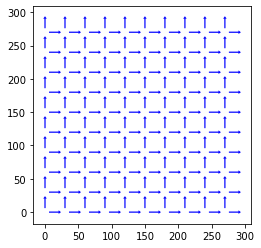

In [2]:
ureg = ice.ureg

sp = ice.spins()
sp.create_lattice("square",[10,10],lattice_constant=30*ureg.um, border="periodic")
sp.display()

In [3]:
particle = ice.particle(radius = 5.15*ureg.um,
             susceptibility = 0.0576,
             diffusion = 0.125*ureg.um**2/ureg.s,
             temperature = 300*ureg.K,
             density = 1000*ureg.kg/ureg.m**3)

trap = ice.trap(trap_sep = 10*ureg.um,
               height = 80*ureg.pN*ureg.nm,
               stiffness = 6e-4*ureg.pN/ureg.nm)

col = ice.colloidal_ice(sp, particle, trap, height_spread = 0, susceptibility_spread = 0.1)
col.pad_region(30*ureg.um)

As before, the display function allows us to visualize the object.

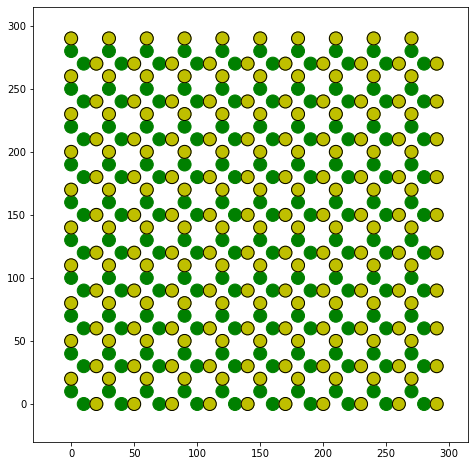

In [4]:
f, (ax2) = plt.subplots(1,1,figsize = (8,8))
col.display(ax2)

# Calculate the energy of a configuration. 

The energy of a configuration is calculated by evaluating the sum of the dipole-dipole interactions:

$$U = \sum_{i,j>i}{
    -\frac{\mu_0}{4\pi}
    \frac{3\left(\vec{m_1}\cdot\vec{r}_{ij}\right)\left(\vec{m_2}\cdot\vec{r}_{ij}\right)}{\left|\vec{r}_{ij}\right|^5} - 
    \frac{\left(\vec{m_1}\cdot\vec{m_2}\right)}{\left|\vec{r}_{ij}\right|^3}}
$$

The physical parameters of the particles ($\chi$, radius) are stored in the `col` object, but the field needs to be specified. The `calculate_energy` method accepts a vector field, or a scalar quantity. If a scalar quantity is given, it is asumed to be in the vertical direction. 

In [5]:
col.calculate_energy(B = [0,0,1]*ureg.mT)

5826.621600989864 <Unit('nanometer * piconewton')>

In [6]:
col.calculate_energy(B = 1*ureg.mT).__class__.__name__

'Quantity'